In [13]:
import pandas as pd 
from utils import (
    load_survey_responses,
    process_survey_responses,
    process_final_responses,
    aggregate_user_responses
)
import config


In [14]:
print("Loading survey responses...")
survey_df = load_survey_responses(
    config.SURVEY_RESULTS_DIR,
    config.SURVEY_RESPONSES_PATTERN
)

Loading survey responses...


In [15]:
survey_df.columns

Index(['user_id', 'age', 'gender', 'marital_status', 'has_children',
       'nationality', 'city', 'disability', 'pets', 'profession', 'hobbies',
       'interests', 'travel_experience', 'preferred_travel_style', 'poi_id',
       'poi_title', 'is_manual_first', 'manual_significance', 'manual_trust',
       'manual_clarity', 'ai_significance', 'ai_trust', 'ai_clarity',
       'engaging_preference', 'relevant_preference', 'eager_preference',
       'title_preference', 'description_preference', 'already_visited',
       'timestamp'],
      dtype='object')

In [16]:
survey_df

,user_id,age,gender,marital_status,has_children,nationality,city,disability,pets,profession,...,ai_significance,ai_trust,ai_clarity,engaging_preference,relevant_preference,eager_preference,title_preference,description_preference,already_visited,timestamp
0,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Strongly Agree,Moderately,Clear,Version B,Version B,Version B,Version A,Version B,I have never heard of it before.,2025-01-25T10:47:20.554734
1,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Moderately,Clear,Version A,Version A,Version A,Version A,Version A,I have seen/heard about it online or from others.,2025-01-25T10:48:24.817328
2,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have seen/heard about it online or from others.,2025-01-25T10:50:03.959372
3,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Very,Clear,Version A,Version B,Version A,Version A,Version A,I have visited it in person.,2025-01-25T10:51:50.531436
4,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Very,Clear,Version A,Version A,Version A,Version A,Version A,I have visited it in person.,2025-01-25T10:53:46.630113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have seen/heard about it online or from others.,2024-12-18T08:49:08.689022
176,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Moderately,Clear,Version B,Version A,Both equally,Both equally,Both equally,I have visited it in person.,2024-12-18T08:50:43.887480
177,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have visited it in person.,2024-12-18T08:51:40.765049
178,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Very,Clear,Both equally,Both equally,Both equally,Version A,Both equally,I have seen/heard about it online or from others.,2024-12-18T08:52:57.080255


In [17]:
import matplotlib.pyplot as plt

def plot_graph(df,cat_type, column_name1, column_name2, title):
   

    # Convert columns to categorical type
    df[column_name1] = df[column_name1].astype(cat_type)
    df[column_name2] = df[column_name2].astype(cat_type)

    # Calculate value counts with the ordered categories
    manual_counts = df[column_name1].value_counts().sort_index()
    ai_counts = df[column_name2].value_counts().sort_index()
    print(f"Manual counts: {manual_counts}, AI counts: {ai_counts}")
    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Set the positions of the bars
    x = range(len(cat_type.categories))
    width = 0.35

    # Create bars
    plt.bar([i - width/2 for i in x], manual_counts, width, 
            label=column_name1, color='#2ecc71')
    plt.bar([i + width/2 for i in x], ai_counts, width, 
            label=column_name2, color='#3498db')

    # Customize the plot
    plt.xlabel('Rating Scale')
    plt.ylabel('Number of Responses')
    plt.title(title)
    plt.xticks(x, cat_type.categories)
    plt.legend()

    # Add value labels on top of bars
    for i, v in enumerate(manual_counts):
        plt.text(i - width/2, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(ai_counts):
        plt.text(i + width/2, v, str(v), ha='center', va='bottom')

    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Show the plot
    plt.show()


Manual counts: manual_significance
Strongly Disagree     5
Disagree              9
Neutral              53
Agree                95
Strongly Agree       18
Name: count, dtype: int64, AI counts: ai_significance
Strongly Disagree      6
Disagree               9
Neutral               41
Agree                103
Strongly Agree        21
Name: count, dtype: int64


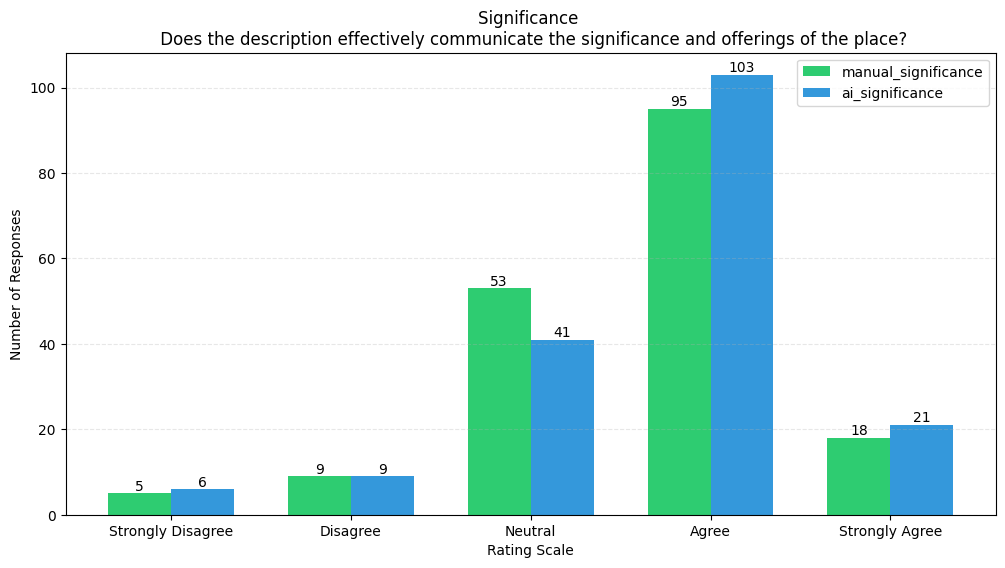

In [18]:
# Does the description effectively communicate the significance and offerings of the place?
cat_type = pd.CategoricalDtype(
        categories=['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'],
        ordered=True
    )
plot_graph(survey_df,cat_type, 'manual_significance','ai_significance', 'Significance \n Does the description effectively communicate the significance and offerings of the place?')

Manual counts: manual_trust
Not at all     3
Slightly      21
Moderately    64
Very          79
Extremely     13
Name: count, dtype: int64, AI counts: ai_trust
Not at all      1
Slightly       18
Moderately     39
Very          103
Extremely      19
Name: count, dtype: int64


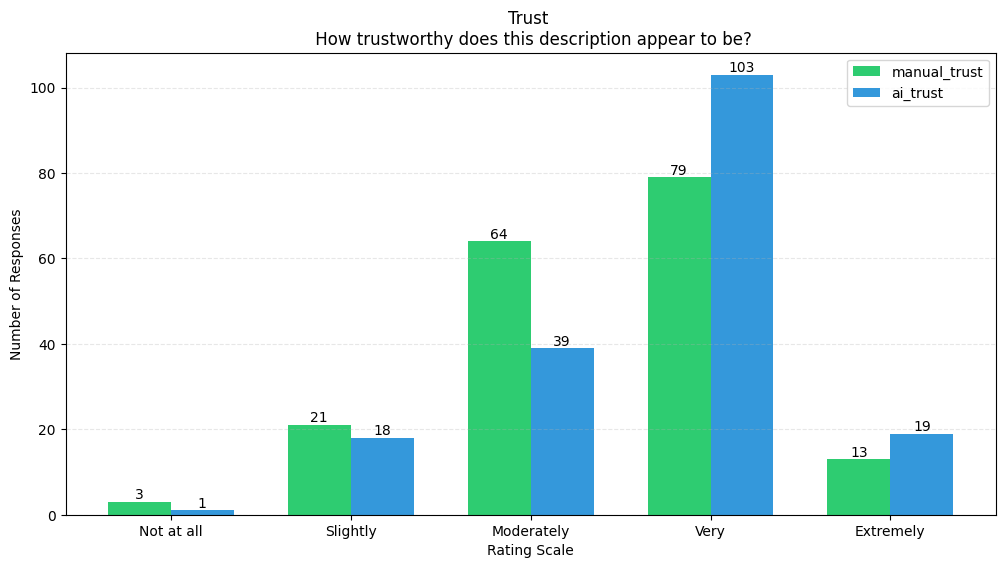

In [19]:
# How trustworthy does this description appear to be?
cat_type = pd.CategoricalDtype(
        categories=["Not at all", "Slightly", "Moderately", "Very", "Extremely"],
        ordered=True
    )
plot_graph(survey_df,cat_type, 'manual_trust','ai_trust', 'Trust \n How trustworthy does this description appear to be?')

Manual counts: manual_clarity
Very Unclear     0
Unclear         12
Neutral         62
Clear           91
Very Clear      15
Name: count, dtype: int64, AI counts: ai_clarity
Very Unclear      3
Unclear           6
Neutral          39
Clear           111
Very Clear       21
Name: count, dtype: int64


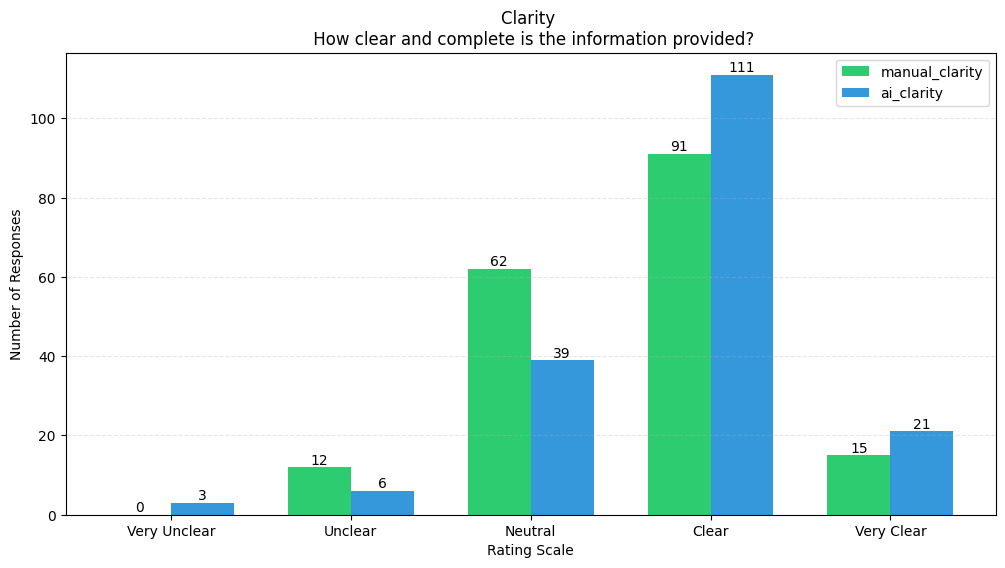

In [20]:
cat_type = pd.CategoricalDtype(
        categories=["Very Unclear", "Unclear", "Neutral", "Clear", "Very Clear"],
        ordered=True
    )
plot_graph(survey_df,cat_type, 'manual_clarity','ai_clarity', 'Clarity \n How clear and complete is the information provided?')

In [21]:
survey_df

,user_id,age,gender,marital_status,has_children,nationality,city,disability,pets,profession,...,ai_significance,ai_trust,ai_clarity,engaging_preference,relevant_preference,eager_preference,title_preference,description_preference,already_visited,timestamp
0,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Strongly Agree,Moderately,Clear,Version B,Version B,Version B,Version A,Version B,I have never heard of it before.,2025-01-25T10:47:20.554734
1,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Moderately,Clear,Version A,Version A,Version A,Version A,Version A,I have seen/heard about it online or from others.,2025-01-25T10:48:24.817328
2,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have seen/heard about it online or from others.,2025-01-25T10:50:03.959372
3,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Very,Clear,Version A,Version B,Version A,Version A,Version A,I have visited it in person.,2025-01-25T10:51:50.531436
4,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Very,Clear,Version A,Version A,Version A,Version A,Version A,I have visited it in person.,2025-01-25T10:53:46.630113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have seen/heard about it online or from others.,2024-12-18T08:49:08.689022
176,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Moderately,Clear,Version B,Version A,Both equally,Both equally,Both equally,I have visited it in person.,2024-12-18T08:50:43.887480
177,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have visited it in person.,2024-12-18T08:51:40.765049
178,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Very,Clear,Both equally,Both equally,Both equally,Version A,Both equally,I have seen/heard about it online or from others.,2024-12-18T08:52:57.080255


engaging_preference: engaging_preference
No Selection     0.0
Manual          74.0
AI Generated    70.0
Both equally    36.0
Name: count, dtype: float64
relevant_preference: relevant_preference
No Selection     0.0
Manual          84.0
AI Generated    61.0
Both equally    35.0
Name: count, dtype: float64
eager_preference: eager_preference
No Selection     0.0
Manual          74.0
AI Generated    68.0
Both equally    38.0
Name: count, dtype: float64
title_preference: title_preference
No Selection     0.0
Manual          75.0
AI Generated    62.0
Both equally    43.0
Name: count, dtype: float64
description_preference: description_preference
No Selection     0.0
Manual          75.0
AI Generated    63.0
Both equally    42.0
Name: count, dtype: float64


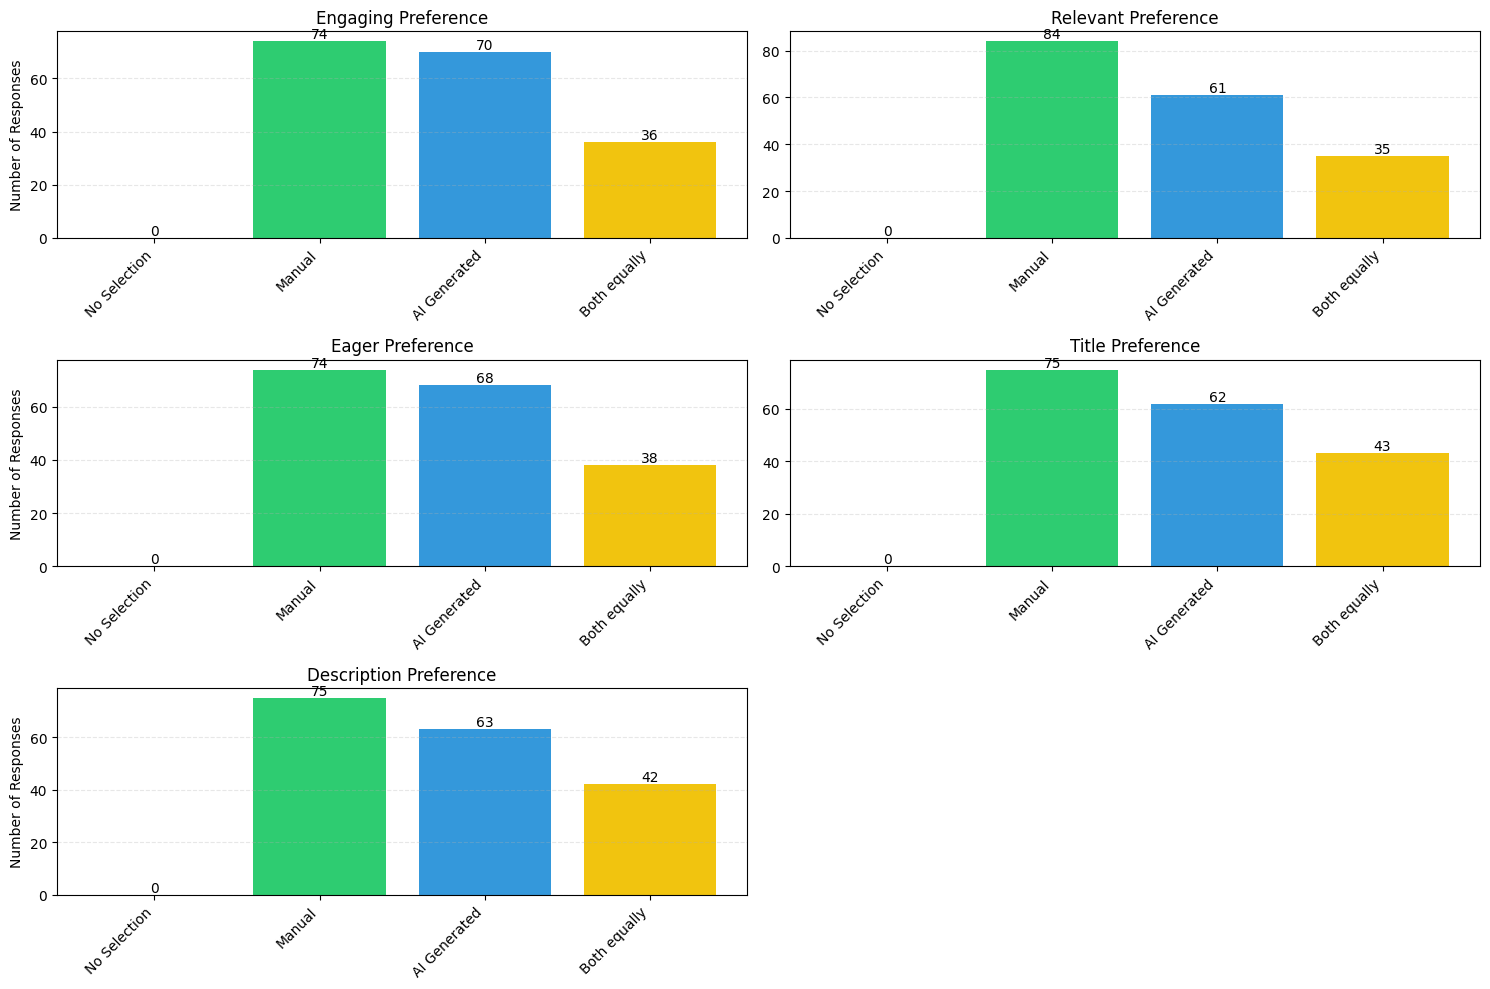

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data


# List of preference columns
preference_columns = [
    'engaging_preference', 
    'relevant_preference', 
    'eager_preference',
    'title_preference', 
    'description_preference'
]

# Function to replace versions based on is_manual_first
def replace_versions(row, column):
    value = row[column]
    if value in ['Version A', 'Version B']:
        if row['is_manual_first']:
            return 'Manual' if value == 'Version A' else 'AI Generated'
        else:
            return 'AI Generated' if value == 'Version A' else 'Manual'
    return value

# Apply the replacement for each preference column
for col in preference_columns:
    survey_df[col] = survey_df.apply(lambda row: replace_versions(row, col), axis=1)

# Create subplots for each preference
plt.figure(figsize=(15, 10))

# Define colors for each category
colors = {
    'No Selection': '#95a5a6',
    'Manual': '#2ecc71',
    'AI Generated': '#3498db',
    'Both equally': '#f1c40f'
}

# Define the order of categories
categories = ['No Selection', 'Manual', 'AI Generated', 'Both equally']

for i, column in enumerate(preference_columns, 1):
    plt.subplot(3, 2, i)
    
    # Count values and reindex to ensure all categories are present
    
    value_counts = survey_df[column].value_counts().reindex(categories).fillna(0)
    print(f"{column}: {value_counts}")
    
    # Create bar plot
    bars = plt.bar(value_counts.index, value_counts.values, 
                  color=[colors[cat] for cat in value_counts.index])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # Customize each subplot
    plt.title(column.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Add y-label only for leftmost plots
    if i % 2 == 1:
        plt.ylabel('Number of Responses')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
survey_df

,user_id,age,gender,marital_status,has_children,nationality,city,disability,pets,profession,...,ai_significance,ai_trust,ai_clarity,engaging_preference,relevant_preference,eager_preference,title_preference,description_preference,already_visited,timestamp
0,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Strongly Agree,Moderately,Clear,AI Generated,AI Generated,AI Generated,Manual,AI Generated,I have never heard of it before.,2025-01-25T10:47:20.554734
1,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Moderately,Clear,Manual,Manual,Manual,Manual,Manual,I have seen/heard about it online or from others.,2025-01-25T10:48:24.817328
2,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Very,Clear,AI Generated,AI Generated,AI Generated,AI Generated,AI Generated,I have seen/heard about it online or from others.,2025-01-25T10:50:03.959372
3,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Very,Clear,AI Generated,Manual,AI Generated,AI Generated,AI Generated,I have visited it in person.,2025-01-25T10:51:50.531436
4,2a8a67f6-21e8-4354-aeba-1a47c759fd45,38,Female,Single,No,Indian,Frankfurt am Main,No,No,Engineer,...,Agree,Very,Clear,Manual,Manual,Manual,Manual,Manual,I have visited it in person.,2025-01-25T10:53:46.630113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Very,Clear,Manual,Manual,Manual,Manual,Manual,I have seen/heard about it online or from others.,2024-12-18T08:49:08.689022
176,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Moderately,Clear,AI Generated,Manual,Both equally,Both equally,Both equally,I have visited it in person.,2024-12-18T08:50:43.887480
177,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Very,Clear,AI Generated,AI Generated,AI Generated,AI Generated,AI Generated,I have visited it in person.,2024-12-18T08:51:40.765049
178,749316a1-f240-4d43-8035-93b8690f6cd4,43,Female,Married,Yes,Indian,Bengaluru,No,No,Engineer,...,Agree,Very,Clear,Both equally,Both equally,Both equally,Manual,Both equally,I have seen/heard about it online or from others.,2024-12-18T08:52:57.080255


In [24]:
survey_df['engaging_preference'].value_counts()

engaging_preference
Manual          74
AI Generated    70
Both equally    36
Name: count, dtype: int64

# loading final

In [27]:
final_response= pd.read_csv("./processed_data/processed_final_responses.csv")

In [28]:
final_response

,timestamp,overall_rating,comments,adaptation_rating,ai_comfort_rating,final_feedback,lottery_email,response_date,response_time
0,2025-01-26 04:50:32.387757,4.0,NaN,4.0,4.0,NaN,vikasalha@gmail.com,2025-01-26,04:50:32.387757
1,2025-01-27 18:27:01.006977,4.0,NaN,4.0,5.0,NaN,skycool2408@gmail.com,2025-01-27,18:27:01.006977
2,2025-01-25 12:32:34.044795,3.0,NaN,3.0,2.0,NaN,NaN,2025-01-25,12:32:34.044795
3,2024-12-18 08:54:40.324446,4.0,NaN,3.0,3.0,NaN,deepsynergy@gmail.com,2024-12-18,08:54:40.324446
4,2025-01-25 10:54:45.854198,NaN,NaN,NaN,NaN,NaN,unniashish13@gmail.com,2025-01-25,10:54:45.854198
5,2025-01-26 17:13:34.054604,4.0,NaN,5.0,5.0,NaN,NaN,2025-01-26,17:13:34.054604
6,2025-01-27 17:22:51.556760,4.0,NaN,4.0,4.0,NaN,gopalnayak.13@gmail.com,2025-01-27,17:22:51.556760
7,2025-01-25 17:10:49.560429,4.0,NaN,4.0,4.0,Satisfied,n.nitinsinha@gmail.com,2025-01-25,17:10:49.560429
8,2025-01-26 05:38:38.423458,NaN,NaN,NaN,NaN,It was a great experience to think through and...,swapnilsharma1@hotmail.com,2025-01-26,05:38:38.423458
9,2025-01-25 12:36:49.080825,4.0,NaN,5.0,4.0,AI generate descriptions are very engaging and...,ameer_khan.ali@outlook.com,2025-01-25,12:36:49.080825


In [35]:
#How would you rate your overall experience with the POI descriptions provided in this study?
print(f'How would you rate your overall experience with the POI descriptions provided in this study? \n \t {final_response['overall_rating'].mean(skipna=True)}')


How would you rate your overall experience with the POI descriptions provided in this study? 
 	 3.8823529411764706


In [36]:
#What is your opinion on the idea of automatically adapting POI descriptions based on user interests?
print(f'What is your opinion on the idea of automatically adapting POI descriptions based on user interests? \n \t {final_response['adaptation_rating'].mean(skipna=True)}')


What is your opinion on the idea of automatically adapting POI descriptions based on user interests? 
 	 3.75


In [37]:
#How comfortable are you with reading AI-generated descriptions when planning visits to new places?
print(f'How comfortable are you with reading AI-generated descriptions when planning visits to new places? \n \t {final_response['ai_comfort_rating'].mean(skipna=True)}')

How comfortable are you with reading AI-generated descriptions when planning visits to new places? 
 	 3.9411764705882355
